## Overview of the notebook 

This notebook contains all code used to produce the Figure 3 of the paper "Computing the Bias of Constant-step Stochastic Approximation with Markovian Noise"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 200
k = 100
def f(theta, x):
    return 1 - (1+theta)*x

def step(theta, x, alpha, random):
    if random: 
        return theta + alpha*f(theta, x), 1 if np.random.rand() <= .5 else 0
    else:
        return theta + alpha*(f(theta, 0)+ f(theta, 1))/2, 0.5

In [3]:
def simulate(n, k, alpha, seed=0):
    np.random.seed(seed)
    thetas, xs = [], []
    theta, x = 0, 0
    for i in range(n):
        theta, x = step(theta, x, alpha, i<k)
        thetas.append(theta)
        xs.append(x)
    return thetas, xs

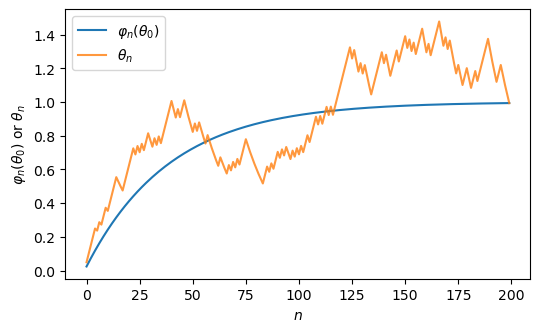

In [4]:
plt.figure(figsize=(6,3.5))
thetas, xs = simulate(200, 0, 0.05, seed=0)
plt.plot(thetas, label='$\\varphi_{n}(\\theta_0)$')
thetas, xs = simulate(200, 200, 0.05, seed=0)
plt.plot(thetas, label='$\\theta_n$', alpha=0.8)
plt.legend()
plt.xlabel('$n$')
plt.ylabel(r'$\varphi_n(\theta_0)$ or $\theta_n$')
plt.savefig('../figs/comparison_systems.pdf', bbox_inches='tight')

y_lim_values = plt.gca().get_ylim()

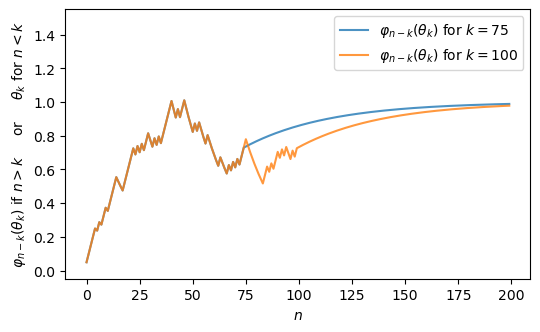

In [5]:
plt.figure(figsize=(6,3.5))
for k in [75, 100]:
    thetas, xs = simulate(200, k, 0.05, seed=0)
    plt.plot(thetas, label='$\\varphi_{}n-k{}(\\theta_k)$ for $k={}$'.format('{','}',k), alpha=0.8)
    # plt.vlines(k, ymin=0., ymax=1., color='black', alpha=.7, linestyles='dashed', linewidth=0.6)
# plt.ylim([0,1.5])
plt.ylim(y_lim_values)
plt.legend()
plt.xlabel('$n$')
plt.ylabel('$\\varphi_{n-k}(\\theta_k)$ if $n>k$     or     $\\theta_k$ for $n<k$')
plt.savefig('../figs/comparison_generators.pdf', bbox_inches='tight')